### Single Packet Tracking ###

In [93]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data
from tardis.io.config_reader import Configuration

#### Downloading the atomic data ####

In [ ]:
# The data are automatically downloaded
download_atom_data('kurucz_cd23_chianti_H_He')

#### Downloading the example file ####

In [3]:
!curl -O https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/tardis_example.yml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   980  100   980    0     0    668      0  0:00:01  0:00:01 --:--:--   668


In [94]:
# Reading the Configuration stored in `tardis_config_packet_tracking.yml` into config

config = Configuration.from_yaml("tardis_example.yml")

In [95]:
# Setting `r_packet_tracking` to True to turn on the Tracking 

config["montecarlo"]["tracking"]["track_rpacket"] = True

In [96]:
# Setting `no_of_packets` to 1 and iterations to 3

config["montecarlo"]["no_of_packets"]=1
config["montecarlo"]["last_no_of_packets"]=1
config["montecarlo"]["iterations"]=3
config["montecarlo"]["no_of_virtual_packets"]=5

In [97]:
config["montecarlo"]

{'seed': 23111963,
 'no_of_packets': 1,
 'iterations': 3,
 'nthreads': 1,
 'last_no_of_packets': 1,
 'no_of_virtual_packets': 5,
 'convergence_strategy': {'type': 'damped',
  'damping_constant': 1.0,
  'threshold': 0.05,
  'fraction': 0.8,
  'hold_iterations': 3,
  't_inner': {'damping_constant': 0.5, 'threshold': 0.05},
  'stop_if_converged': False,
  'lock_t_inner_cycles': 1,
  't_inner_update_exponent': -0.5,
  't_rad': {'damping_constant': 1.0, 'threshold': 0.05},
  'w': {'damping_constant': 1.0, 'threshold': 0.05}},
 'virtual_spectrum_spawn_range': {'start': <Quantity 1. Angstrom>,
  'end': <Quantity inf Angstrom>},
 'enable_reflective_inner_boundary': False,
 'inner_boundary_albedo': 0.0,
 'enable_full_relativity': False,
 'tracking': {'track_rpacket': True, 'initial_array_length': 10},
 'debug_packets': False,
 'logger_buffer': 1,
 'single_packet_seed': -1}

#### Running the simulation (long output) ####

In [98]:
sim = run_tardis(config,show_progress_bars=True,virtual_packet_logging=True)

[tardis.plasma.standard_plasmas][INFO   ]  
	
	Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:92)
[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:204)
[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data (base.py:209)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 1 of 3 (base.py:378)


TqdmHBox(children=(HTML(value='Packets:   ', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.051e+43 erg / s
	Luminosity absorbed  = 0.000e+00 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:514)


Shell No.,t_rad,next_t_rad,w,next_w
0,9.93e+03,1.05e+04,0.4,0.323
5,9.85e+03,1.03e+04,0.211,0.486
10,9.78e+03,1.01e+04,0.143,0.191
15,9.71e+03,9.99e+03,0.105,0.125


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 9933.952 K
	Expected t_inner for next iteration = 9953.127 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 2 of 3 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.103e+43 erg / s
	Luminosity absorbed  = 0.000e+00 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:514)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.05e+04,4.92e+03,0.323,4.51
5,1.03e+04,4.88e+03,0.486,3.09
10,1.01e+04,4.84e+03,0.191,2.27
15,9.99e+03,4.8e+03,0.125,1.76


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 9953.127 K
	Expected t_inner for next iteration = 9852.805 K
 (base.py:542)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 3 of 3 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.011e+43 erg / s
	Luminosity absorbed  = 0.000e+00 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:547)
[tardis.simulation.base][INFO   ]  
	
	Simulation finished in 3 iterations 
	Simulation took 0.27 s
 (base.py:468)


```python
# Basic structure for the RPacketCollection Class
class RPacketCollection:
   # Properties
    index
    seed
    status
    r
    nu
    mu
    energy
    shell_id
```

In [99]:
sim.runner.rpacket_tracker[0].mu

array([0.22523484, 0.35196527, 0.43461238, 0.47585226, 0.52574082,
       0.57130286, 0.60939711, 0.64185964, 0.66991747, 0.69443827,
       0.71606127, 0.73527229, 0.30651928, 0.33099281, 0.39717961,
       0.44959703, 0.49305674, 0.53009079, 0.56223823, 0.59052207,
       0.61566514, 0.63820122, 0.65853793])

In [100]:
sim.runner.rpacket_tracker[0].shell_id

array([ 0,  1,  2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 19])

#### Plotting the trajectory of Packet ####

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'mu (Propagation Direction of the Packet)')

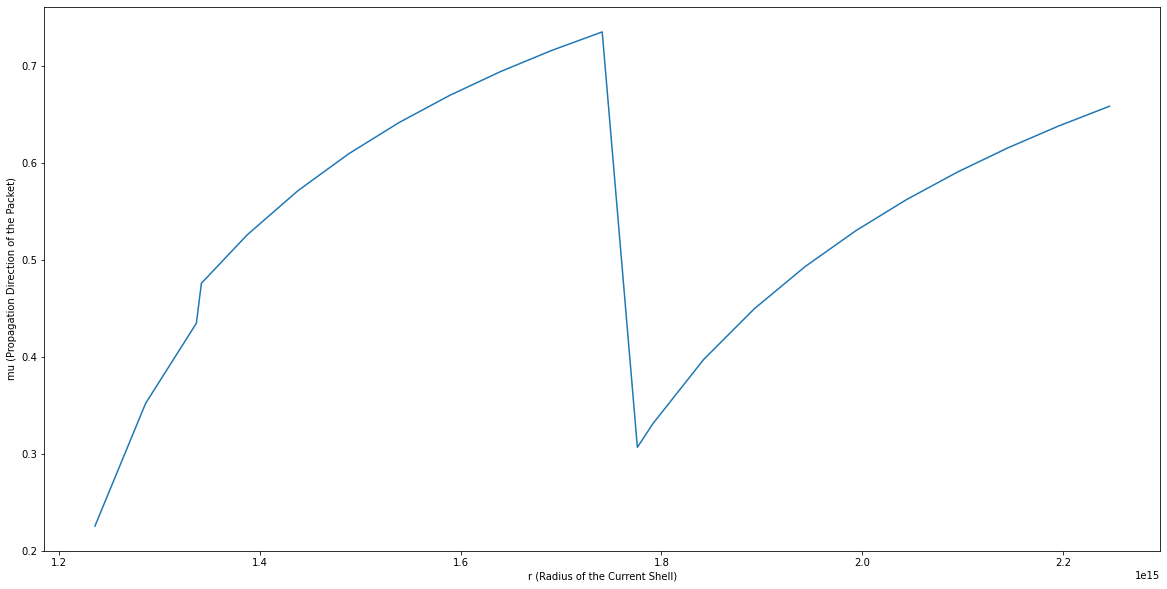

In [101]:
#Plotting the trajectory of real packet i.e. plotting the graph of mu vs r 

%pylab inline
figure(figsize=(20,10))
plot(sim.runner.rpacket_tracker[0].r,sim.runner.rpacket_tracker[0].mu)
xlabel('r (Radius of the Current Shell)')
ylabel('mu (Propagation Direction of the Packet)')